[0] 학습에 앞서 MNIST 데이터셋 불러오기 및 확인

In [41]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [42]:
X, y = mnist.data, mnist.target

In [43]:
X.shape

(70000, 784)

In [44]:
y.shape

(70000,)

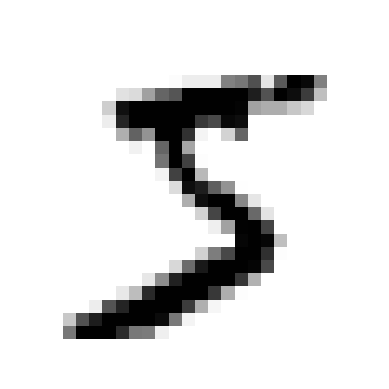

In [130]:
# 정상출력 확인
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.show()

some_digit = X[0]
plot_digit(some_digit)
plt.show()

## 목표: MNIST 기계학습 진행 실습 및 검증 이미지 이진분류(가능하면 다중)
- 1차 기계학습 테스트 진행
- 모델에 따른 성능지표 
- 경사하강법 개념 및 다양한 경사하강법들
- 확률적경사하강법기반 모델 개념과 하이퍼파라미터

In [128]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

[1] 모듈 로딩 및 데이터 준비 <hr>

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


[2-1] 피쳐/타겟 분리
- 이미 되어있음

[2-2] 학습/테스트용 데이터셋 분리

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=17)

In [48]:
print(f'[훈련용] => X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print(f'[테스트용] => X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

[훈련용] => X_train.shape: (52500, 784), y_train.shape: (52500,)
[테스트용] => X_test.shape: (17500, 784), y_test.shape: (17500,)


[2-3] 스케일링 (근데 이거 필요할까..?)
- 아니다 쓰지말자

In [49]:
# from sklearn.preprocessing import StandardScaler
# sdScaler = StandardScaler()
# sdScaler.fit(X_train)

In [50]:
# sd_X_train = sdScaler.transform(X_train)    # 훈련데이터 스케일링
# sd_X_test = sdScaler.transform(X_test)      # 테스트데이터 스케일링

In [51]:
# sd_X_train

[3] 학습진행
- 학습방법 : 확률적 경사하강법(SGD)
- 학습목표 : 숫자'2'를 식별하는 이진분류기

In [52]:
y_train[0]

'8'

In [53]:
y_train_2 = (y_train=='2')    # 2이면 true 아니면 False
y_test_2 = (y_test=='2')
y_train_2

array([False, False, False, ...,  True, False, False])

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [55]:
# 모델 인스턴스형성(1) - SGDClassifier
from sklearn.linear_model import SGDClassifier
# X와 2만 분류하는 y 학습 - fit model1
model1 = SGDClassifier(random_state=17, loss='log_loss')
model1.fit(X_train,y_train_2)

SGDClassifier(loss='log_loss', random_state=17)

In [56]:
train_score1 = model1.score(X_train, y_train_2)
test_score1 = model1.score(X_test, y_test_2)

In [66]:
# SGDClassifier 평가
print(f'[기본 SGD] 훈련 점수 : {train_score1}, 테스트 점수 : {test_score1}')       
# 미묘한 과대적합?

[기본 SGD] 훈련 점수 : 0.9783238095238095, 테스트 점수 : 0.9750857142857143


In [58]:
# 모델 파라미터
print(f'n_iter_: {model1.n_iter_}')

n_iter_: 165


[3-1] 분류평가지표

In [69]:
from sklearn.metrics import accuracy_score
# 분류 정확도
y_pre = model1.predict(X_test)
ret1 = accuracy_score(y_test_2, y_pre)
print(f'[분류 정확도]=> accuracy score : {ret1}')

# 정밀도
from sklearn.metrics import precision_score
pre_score1 = precision_score(y_test_2, y_pre)
print(f'[분류 정밀도]=> precision score : {pre_score1}')

# 재현율
from sklearn.metrics import recall_score
re_score1 = recall_score(y_test_2, y_pre)
print(f'[분류 재현율]=> recall score : {re_score1}')

[분류 정확도]=> accuracy score : 0.9750857142857143
[분류 정밀도]=> precision score : 0.9074534161490683
[분류 재현율]=> recall score : 0.835812356979405


In [70]:
# f1_score
from sklearn.metrics import f1_score
f1_score1 = f1_score(y_test_2, y_pre)
print(f'[분류 f1 점수]=> f1 score : {f1_score1}')

[분류 f1 점수]=> f1 score : 0.8701608100059558


[3-2] partial_fit 적용

In [78]:
# 모델 인스턴스형성(2) - SGDClassifier

# 마찬가지로 X와 2만 분류하는 y 학습
model2 = SGDClassifier(random_state=17, loss='log_loss')
model2.partial_fit(X_train,y_train_2, y_train_2)

SGDClassifier(loss='log_loss', random_state=17)

In [79]:
train_score2 = model2.score(X_train,y_train_2)
test_score2 = model2.score(X_test,y_test_2)

In [80]:
print(f'[기본 SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}')

[기본 SGD] 학습 점수 : 0.9732, 테스트 점수 : 0.9736571428571429


In [81]:
train_score, test_score = [],[]
deathcount = 0
for n in range(1,101):
    model2.partial_fit(X_train, y_train_2, y_train_2)
    train_score2 = model2.score(X_train, y_train_2)
    test_score2 = model2.score(X_test, y_test_2)
    print(f'[{n}번학습] [기본 SGD] 학습 점수 : {train_score2}, 테스트점수 : {test_score2}')
    train_score.append(train_score2)
    test_score.append(test_score2)
    if (test_score2>=0.9) and (abs(test_score2-train_score2)>=0.03):
        deathcount += 1
        if deathcount>10:
            break

[1번학습] [기본 SGD] 학습 점수 : 0.9689523809523809, 테스트점수 : 0.9691428571428572
[2번학습] [기본 SGD] 학습 점수 : 0.9643428571428572, 테스트점수 : 0.9650857142857143
[3번학습] [기본 SGD] 학습 점수 : 0.9720190476190477, 테스트점수 : 0.9719428571428571
[4번학습] [기본 SGD] 학습 점수 : 0.9773333333333334, 테스트점수 : 0.9763428571428572
[5번학습] [기본 SGD] 학습 점수 : 0.9736571428571429, 테스트점수 : 0.9729142857142857
[6번학습] [기본 SGD] 학습 점수 : 0.9552571428571428, 테스트점수 : 0.9572571428571428
[7번학습] [기본 SGD] 학습 점수 : 0.9742666666666666, 테스트점수 : 0.9732
[8번학습] [기본 SGD] 학습 점수 : 0.9583428571428572, 테스트점수 : 0.9595428571428571
[9번학습] [기본 SGD] 학습 점수 : 0.9749904761904762, 테스트점수 : 0.9732571428571428
[10번학습] [기본 SGD] 학습 점수 : 0.9667619047619047, 테스트점수 : 0.9669142857142857
[11번학습] [기본 SGD] 학습 점수 : 0.9783047619047619, 테스트점수 : 0.9772
[12번학습] [기본 SGD] 학습 점수 : 0.972152380952381, 테스트점수 : 0.9713142857142857
[13번학습] [기본 SGD] 학습 점수 : 0.9675047619047619, 테스트점수 : 0.9690285714285715
[14번학습] [기본 SGD] 학습 점수 : 0.9732952380952381, 테스트점수 : 0.9731428571428572
[15번학습] [기본 SGD] 학습 점수 : 0

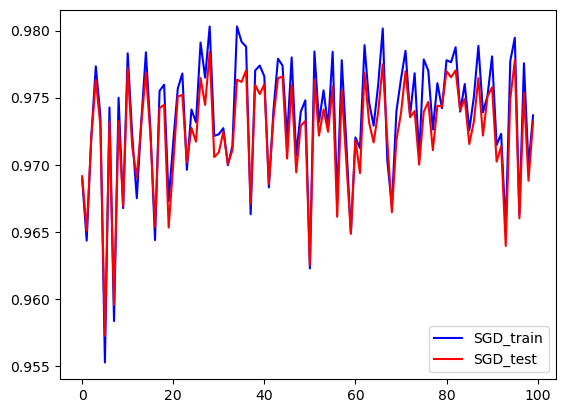

In [82]:
# 시각화
plt.plot(train_score, 'b-',label='SGD_train')
plt.plot(test_score, 'r-',label='SGD_test')
plt.legend()
plt.show()

In [83]:
test_score.index(max(test_score))       

28

In [84]:
# 재학습
model2 = SGDClassifier(random_state=17, loss='log_loss', n_iter_no_change=29)
model2.partial_fit(X_train,y_train_2, y_train_2)
train_score2 = model2.score(X_train,y_train_2)
test_score2 = model2.score(X_test,y_test_2)
print(f'[ SGD] 학습 점수 : {train_score2}, 테스트 점수 : {test_score2}')


# 분류 정확도
y_pre2 = model2.predict(X_test)
ret2 = accuracy_score(y_test_2, y_pre2)
print(f'[분류 정확도]=> accuracy score : {ret2}')

# 정밀도
from sklearn.metrics import precision_score
pre_score2 = precision_score(y_test_2, y_pre2)
print(f'[분류 정밀도]=> precision score : {pre_score2}')

# 재현율
from sklearn.metrics import recall_score
re_score2 = recall_score(y_test_2, y_pre2)
print(f'[분류 재현율]=> recall score : {re_score2}')

# f1_score
from sklearn.metrics import f1_score
f1_score2 = f1_score(y_test_2, y_pre2)
print(f'[분류 f1 점수]=> f1 score : {f1_score2}')

[기본 SGD] 학습 점수 : 0.9732, 테스트 점수 : 0.9736571428571429
[분류 정확도]=> accuracy score : 0.9736571428571429
[분류 정밀도]=> precision score : 0.9626168224299065
[분류 재현율]=> recall score : 0.7660183066361556
[분류 f1 점수]=> f1 score : 0.8531379420197515


partial_fit 로 정확도 소량감소, 정밀도 소량증가, 재현율,f1 점수 감소

[3-3] 회귀모델(LogisticRegression)

In [86]:
# 모델 인스턴스형성(3) - LogisticRegression
from sklearn.linear_model import LogisticRegression
# 마찬가지로 X와 2만 분류하는 y 학습
model3 = LogisticRegression(random_state=17, max_iter=3000)
model3.fit(X_train,y_train_2)

C:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000, random_state=17)

In [87]:
# LogisticRegression 평가
model3.score(X_train, y_train_2)  

0.9831047619047619

In [88]:
# LogisticRegression 평가
print(f'[학습점수] : {model3.score(X_train, y_train_2)}')
print(f'[테스트점수] : {model3.score(X_test, y_test_2)}')

[학습점수] : 0.9831047619047619
[테스트점수] : 0.9790285714285715


[3-4] 회귀모델 평가

In [89]:
y_pre3 = model3.predict(X_test)

In [91]:
# 분류 정확도
ret3 = accuracy_score(y_test_2, y_pre3)
print(f'[분류 정확도]=> accuracy score : {ret3}')

# 정밀도
pre_score3 = precision_score(y_test_2, y_pre3)
print(f'[분류 정밀도]=> precision score : {pre_score3}')

# 재현율
re_score3 = recall_score(y_test_2, y_pre3)
print(f'[분류 재현율]=> recall score : {re_score3}')

# f1_score
f1_score3 = f1_score(y_test_2, y_pre3)
print(f'[분류 f1 점수]=> f1 score : {f1_score3}')

[분류 정확도]=> accuracy score : 0.9790285714285715
[분류 정밀도]=> precision score : 0.9192471159684275
[분류 재현율]=> recall score : 0.8661327231121282
[분류 f1 점수]=> f1 score : 0.891899852724595


[4] 검증

In [96]:

from PIL import Image

# 파일을 열어 L(256단계 흑백이미지)로 변환
img = Image.open(f'../data/hard2.png').convert('L')

# 이미지를 784개 흑백 픽셀 사이즈반환
img = np.resize(img, (1,784))

test_data = 255-img
test_data

result1 = model1.predict(test_data)
result2 = model2.predict(test_data)
result3 = model3.predict(test_data)
print(f'model1 결과 : {result1}')
print(f'model2 결과 : {result2}')
print(f'model3 결과 : {result3}')

model1 결과 : [False]
model2 결과 : [False]
model3 결과 : [False]


0번 그림 --------------


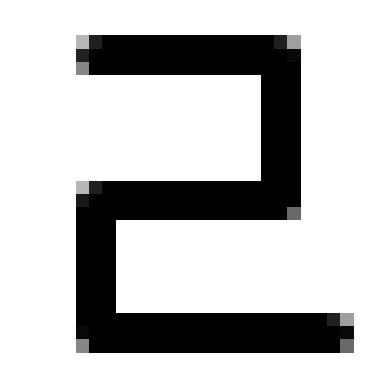

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
1번 그림 --------------


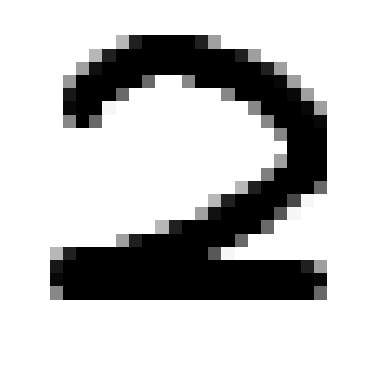

SGD fit         결과 : [ True]
SGD partial_fit 결과 : [ True]
LogisticRegress 결과 : [ True]
2번 그림 --------------


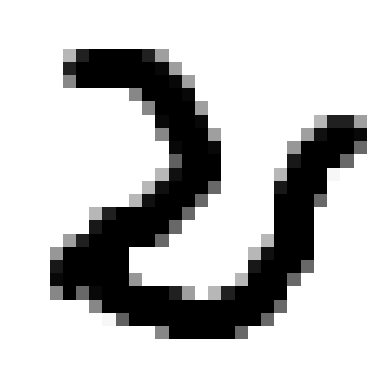

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
3번 그림 --------------


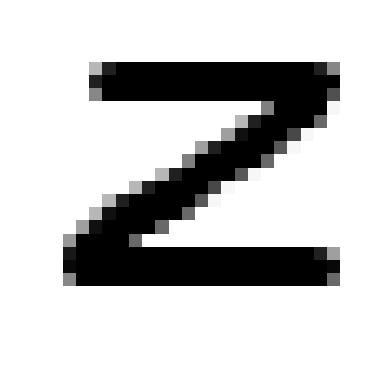

SGD fit         결과 : [False]
SGD partial_fit 결과 : [ True]
LogisticRegress 결과 : [False]
4번 그림 --------------


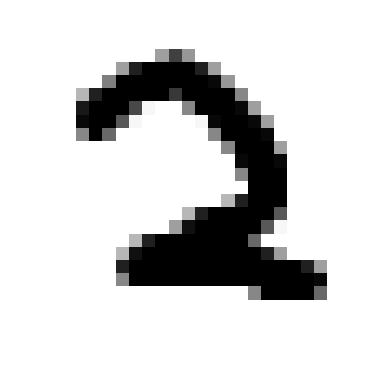

SGD fit         결과 : [ True]
SGD partial_fit 결과 : [ True]
LogisticRegress 결과 : [ True]
5번 그림 --------------


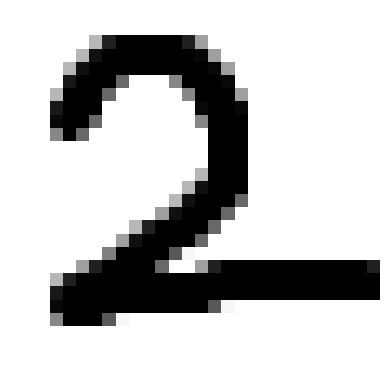

SGD fit         결과 : [ True]
SGD partial_fit 결과 : [ True]
LogisticRegress 결과 : [ True]
6번 그림 --------------


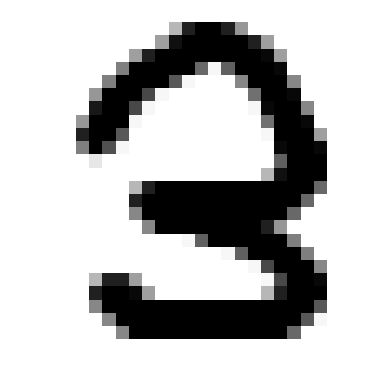

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
7번 그림 --------------


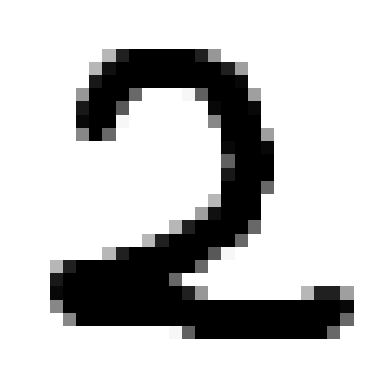

SGD fit         결과 : [ True]
SGD partial_fit 결과 : [ True]
LogisticRegress 결과 : [ True]
8번 그림 --------------


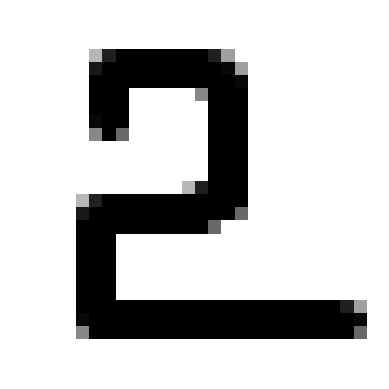

SGD fit         결과 : [ True]
SGD partial_fit 결과 : [ True]
LogisticRegress 결과 : [False]
9번 그림 --------------


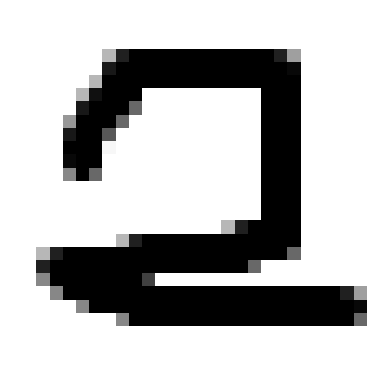

SGD fit         결과 : [ True]
SGD partial_fit 결과 : [ True]
LogisticRegress 결과 : [False]


In [110]:
# for 문 돌려서 될때 까지 그려보자
model1_list, model2_list, model3_list = [],[],[]
for n in range(10):
    img = Image.open(f'../data/hard{n}.png').convert('L')
    img = np.resize(img, (1,784))
    test_data = 255-img
    result1 = model1.predict(test_data)
    result2 = model2.predict(test_data)
    result3 = model3.predict(test_data)
    model1_list.append(result1)
    model2_list.append(result2)
    model3_list.append(result3)
    print(f'{n}번 그림 --------------')
    plot_digit(test_data)
    print(f'SGD fit         결과 : {result1}')
    print(f'SGD partial_fit 결과 : {result2}')
    print(f'LogisticRegress 결과 : {result3}')

In [102]:
print(f'SGD fit     모델 점수 : {sum(model1_list)/len(model1_list)}')
print(f'SGD partial 모델 점수 : {sum(model2_list)/len(model2_list)}')
print(f'LogisticReg 모델 점수 : {sum(model3_list)/len(model3_list)}')

SGD fit     모델 점수 : [0.6]
SGD partial 모델 점수 : [0.7]
LogisticReg 모델 점수 : [0.4]


결론 : 내 글씨체로는 SGD partial과 가장 잘 맞다

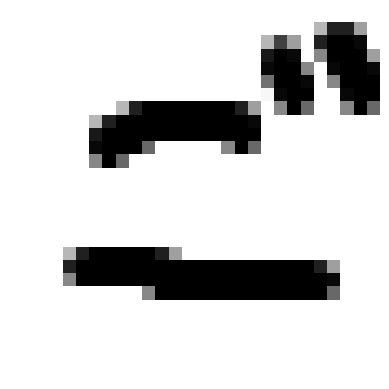

SGD fit     결과 : [False]
SGD partial 결과 : [ True]
Logistic    결과 : [False]


In [124]:


# 파일을 열어 L(256단계 흑백이미지)로 변환
img = Image.open(f'../data/test1.png').convert('L')

# 이미지를 784개 흑백 픽셀 사이즈반환
img = np.resize(img, (1,784))

test_data = 255-img
test_data

result1 = model1.predict(test_data)
result2 = model2.predict(test_data)
result3 = model3.predict(test_data)
plot_digit(test_data)
print(f'SGD fit     결과 : {result1}')
print(f'SGD partial 결과 : {result2}')
print(f'Logistic    결과 : {result3}')

1번 그림 --------------


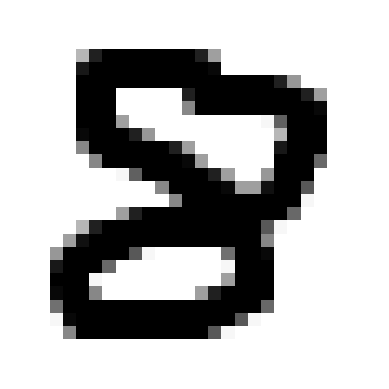

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
2번 그림 --------------


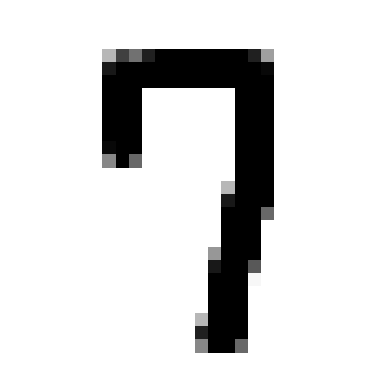

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
3번 그림 --------------


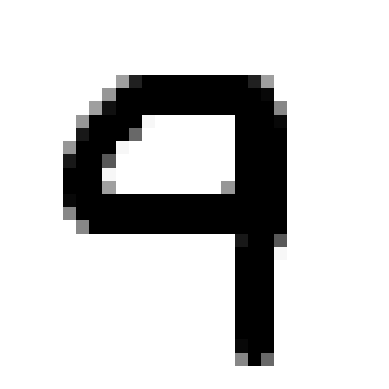

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
4번 그림 --------------


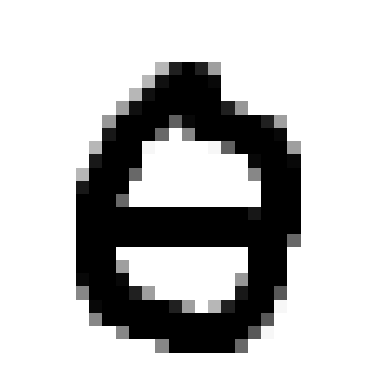

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
5번 그림 --------------


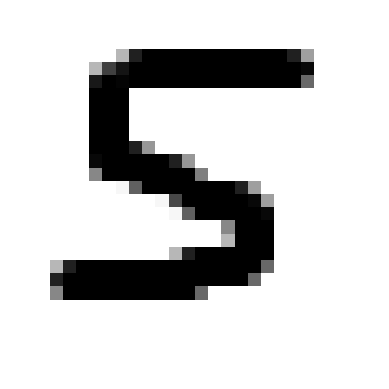

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
6번 그림 --------------


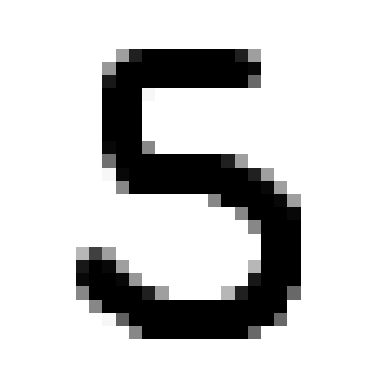

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]
7번 그림 --------------


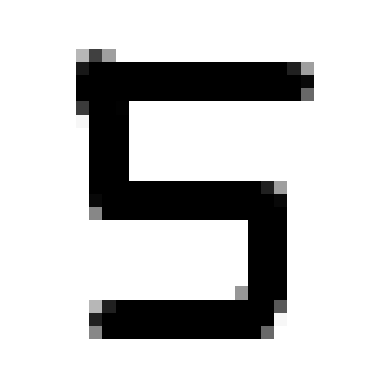

SGD fit         결과 : [False]
SGD partial_fit 결과 : [False]
LogisticRegress 결과 : [False]


In [125]:
# for 문 돌려서 될때 까지 그려보자
model1_list, model2_list, model3_list = [],[],[]
for n in range(1,8):
    img = Image.open(f'../data/no{n}.png').convert('L')
    img = np.resize(img, (1,784))
    test_data = 255-img
    result1 = model1.predict(test_data)
    result2 = model2.predict(test_data)
    result3 = model3.predict(test_data)
    model1_list.append(result1)
    model2_list.append(result2)
    model3_list.append(result3)
    print(f'{n}번 그림 --------------')
    plot_digit(test_data)
    print(f'SGD fit         결과 : {result1}')
    print(f'SGD partial_fit 결과 : {result2}')
    print(f'LogisticRegress 결과 : {result3}')